In [19]:
!pip install pyCalor

In [20]:
from pyCalor import thermo as th
import numpy as np
import matplotlib.pyplot as plt

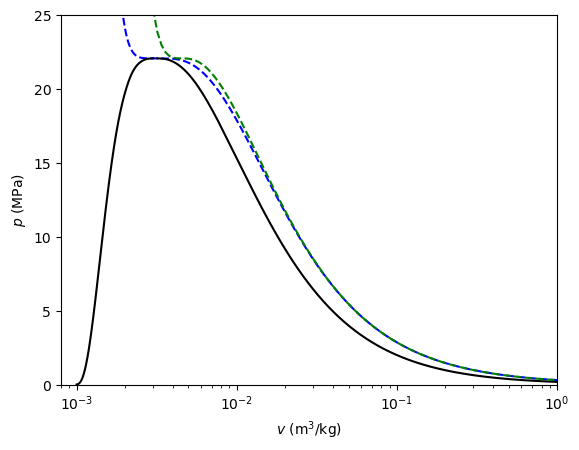

In [29]:
plt.figure()
plt.clf()
Tc_K = 647.096 
pc_Pa = 22.060e6

Ttp_K = 273.16
ptp_Pa = 611.6

# stcritical = th.state('Water', p=pc_Pa/1e3, T=Tc_K, name="1")

# plt.xscale("log")
# plt.plot(stcritical.v,stcritical.P/1000, marker = "o", color="black")

P_ = np.linspace(700/1e6, 30, 1000) # range of pressures
for T in [Tc_K]: #K
    st = [th.state('Water', p=p*1e3, T=T) for p in P_]
    v = [s.v for s in st]
    plt.xscale("log")
    plt.plot(v, P_, 'b--')

P = np.linspace(700/1e6, 22.063, 1000) # range of pressures
vvap = [s.v for s in [th.state('Water', x=1, p=p*1e3) for p in P]]
vliq = [s.v for s in [th.state('Water', x=0, p=p*1e3) for p in P]]

plt.plot(vvap, P, 'k-')
plt.plot(vliq, P, 'k-')

plt.xscale("log")
#plt.plot(v1,p1_MPa, marker = 10)

#plt.xlabel('v (m3/kg)')
#plt.ylabel('p (MPa)')

R_JperKgPerK = 461.5
a = 0.42748*((R_JperKgPerK**2)*(Tc_K**2.5))/pc_Pa
b = 0.08664*(R_JperKgPerK*Tc_K)/pc_Pa

# critical point
v_ = np.linspace(3e-3, 1, 5000)
T = Tc_K
p_ = ((R_JperKgPerK*T)/(v_ - b)) - a/((T**0.5)*v_*(v_ + b))
plt.plot(v_, p_/1e6, 'g--')

ax = plt.gca()
xmin = 0.8e-3
xmax = 1
ax.set_xlim([xmin, xmax])
ymin = 0
ymax = 25
ax.set_ylim([ymin, ymax])

ax.set_xlabel('$v$ (m$^3$/kg)')
ax.set_ylabel('$p$ (MPa)')

plt.savefig('pycalor-redlich-kwong-p-v-diagram.pdf')

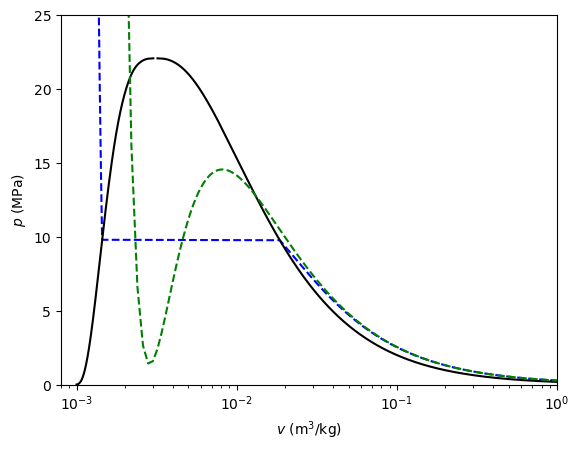

In [28]:
plt.figure()
plt.clf()
Tc_K = 647.096 
pc_Pa = 22.060e6

Ttp_K = 273.16
ptp_Pa = 611.6

stcritical = th.state('Water', p=pc_Pa/1e3, T=Tc_K, name="1")

plt.xscale("log")
#plt.plot(stcritical.v,stcritical.P/1000, marker = "o", color="black")

P_ = np.linspace(700/1e6, 30, 1000) # range of pressures
for T in [Tc_K*0.9]: #K
    st = [th.state('Water', p=p*1e3, T=T) for p in P_]
    v = [s.v for s in st]
    plt.xscale("log")
    plt.plot(v, P_, 'b--')

P = np.linspace(700/1e6, 22.063, 1000) # range of pressures

vvap = [s.v for s in [th.state('Water', x=1, p=p*1e3) for p in P]]
vliq = [s.v for s in [th.state('Water', x=0, p=p*1e3) for p in P]]

plt.plot(vvap, P, 'k-')
plt.plot(vliq, P, 'k-')

plt.xscale("log")

R_JperKgPerK = 461.5
a = 0.42748*((R_JperKgPerK**2)*(Tc_K**2.5))/pc_Pa
b = 0.08664*(R_JperKgPerK*Tc_K)/pc_Pa

# 90% of the critical point temperature
T = 0.9*Tc_K
v__ = np.linspace(0.002, 1, 5000)
p__ = ((R_JperKgPerK*T)/(v__ - b)) - a/((T**0.5)*v__*(v__ + b))
plt.plot(v__, p__/1e6, 'g--')

ax = plt.gca()
xmin = 0.8e-3
xmax = 1

ax.set_xlim([xmin, xmax])
ymin = 0
ymax = 25
ax.set_ylim([ymin, ymax])

ax.set_xlabel('$v$ (m$^3$/kg)')
ax.set_ylabel('$p$ (MPa)')

plt.savefig('pycalor-redlich-kwong-p-v-diagram-subcritical.pdf')